In [19]:
!pip install langchain-community ddgs wikipedia langchain

  Using cached langgraph_checkpoint-4.0.0-py3-none-any.whl.metadata (4.9 kB)
Using cached langgraph_checkpoint-4.0.0-py3-none-any.whl (46 kB)



[notice] A new release of pip is available: 25.0.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser, PydanticOutputParser

load_dotenv()

llm = ChatGroq(temperature=0.7, model="llama-3.3-70b-versatile", api_key=os.getenv("GROQ_API_KEY"))

# Tools

In [17]:
# Tool 1 - News Search tool

from langchain_community.tools import DuckDuckGoSearchRun

search_tool = DuckDuckGoSearchRun(description="This is a tool to search the web for recent news and information")

In [ ]:
search_tool.invoke("Who is Pulina Wickramasooriya?")

'View Pulina Wickramasooriya ’ s profile on LinkedIn, a professional community of 1 billion members. Pulina Wickramasooriya is on Facebook. Join Facebook to connect with Pulina Wickramasooriya and others you may know. Facebook gives people the power to... My career path is growing as a Software Engineer and Full Stack Developer with Generative AI integration, alongside a strong interest in Artificial Intelligence and Machine Learning. I enjoy building scalable, real-world software solutions and exploring how intelligent systems can enhance modern applications. We’re thrilled to announce the successful completion of our second-year software engineering project "Pinnacle", an AI-powered e-commerce clothing platform designed to redefine the online ... Folders and files ... Repository files navigation Hi there 👋 I\'m Pulina Wickramasooriya My career path is growing as an Software Engineer and a Full Stack Developer. I enjoy solving real-world challenges through softwares. My initial progra

In [16]:
# Tool 2 - Wikipedia Search tool

from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

wikipedia_tool = WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(), description="This is a tool to search Wikipedia")

In [15]:
wikipedia_tool.invoke("Ravana")

'Page: Ravana\nSummary: Ravana (Sanskrit: रावण, romanized: Rāvaṇa, lit.\u2009\'roaring\') is the principal antagonist of the ancient Hindu epic Ramayana and its several other versions. He is traditionally depicted as a ten-headed rakshasa (demon) king of Lanka (present-day Sri Lanka). In the Ramayana, Ravana is described as the eldest son of sage Vishrava and Kaikasi. He abducted Rama\'s wife, Sita, and took her to his kingdom of Lanka, where he held her in the Ashoka Vatika. Rama, with the support of vanara King Sugriva and his army of vanaras, launched a rescue operation for Sita against Ravana in Lanka. Ravana was subsequently slain, and Rama rescued his beloved wife Sita.\nRavana was well-versed in the six shastras and the four Vedas, including the Shiva Tandava Stotra. Ravana is also considered to be the most revered devotee of Shiva. Images of Ravana are often seen associated with Shiva at temples. He also appears in the Buddhist Mahayana text Laṅkāvatāra Sūtra, in Buddhist Jatak

In [21]:
# Tool 3 - Custom Enterprise tool

from langchain.tools import tool

@tool
def enterprise_tool(query: str) -> str:
    """This is a tool to send emails to employee"""
    return "Email Sent"

In [22]:
ToolKit = [search_tool, wikipedia_tool, enterprise_tool]

# **ReAct Agent**

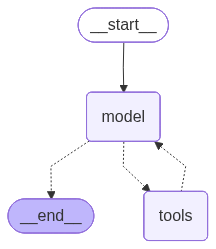

In [23]:
from langchain.agents import create_agent
from langchain_groq import ChatGroq

model = ChatGroq(
    model="llama-3.3-70b-versatile", 
    temperature=0.1, 
    api_key=os.getenv("GROQ_API_KEY"), 
    max_tokens=1000, 
    timeout=30
)

agent = create_agent(model, tools=ToolKit)
agent

# ReAct Agent Invoke with Streams

In [26]:
example_query = "What are latest news of sri lanka."

events = agent.stream(
    {"messages": [("user", example_query)]},
    stream_mode="values",
)

for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What are latest news of sri lanka.
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (zcnsyemag)
 Call ID: zcnsyemag
  Args:
    query: Sri Lanka latest news
================================= Tool Message =================================
Name: duckduckgo_search

Feb 2, 2026 · News.lk - The Official Government News Portal of Sri Lanka, providing timely updates and comprehensive news coverage in Sinhala, Tamil, and English. 3 hours ago · Looking for the latest Sri Lanka news? TheMorning.lk provides you with latest news, business news, sports, and lifestyle articles from Sri Lanka. 1 day ago · Comments ; 32:45 · Go to channel Newsfirst Sri Lanka · Newsfirst Sri Lanka ; LIVE · Go to channel Siyatha News International ; 24:56 · Go to channel Ada Derana · Ada ... 6 hours ago · Lankadeepa.lk Sri Lanka First Sinhala breaking news website updates 24 H

RateLimitError: Error code: 429 - {'error': {'message': 'Rate limit reached for model `llama-3.3-70b-versatile` in organization `org_01kbg28hy6ekfr4ggc4z1dsctr` service tier `on_demand` on tokens per day (TPD): Limit 100000, Used 98694, Requested 3772. Please try again in 35m30.624s. Need more tokens? Upgrade to Dev Tier today at https://console.groq.com/settings/billing', 'type': 'tokens', 'code': 'rate_limit_exceeded'}}

# Manually Binding The LLM with Tools

In [27]:
# without binding
llm.invoke("What are latest news of sri lanka.")

AIMessage(content="As my knowledge cutoff is March 2023, I'll provide you with the latest news about Sri Lanka up to that date. Please note that the situation may have changed since then.\n\n**Economic Crisis:**\nSri Lanka has been facing a severe economic crisis, with high inflation, fuel shortages, and a depreciation of the local currency, the Sri Lankan Rupee. The country has been struggling to pay its foreign debt, and the government has been implementing austerity measures to stabilize the economy.\n\n**Protests and Unrest:**\nThere have been widespread protests and demonstrations across the country, with citizens demanding the resignation of President Gotabaya Rajapaksa and his government. The protests have been largely peaceful, but there have been instances of violence and clashes between protesters and security forces.\n\n**Political Developments:**\nIn July 2022, President Gotabaya Rajapaksa resigned and fled the country, following intense protests and pressure from the oppos

In [29]:
# with binding
llm_binded = llm.bind_tools(ToolKit)
llm_binded.invoke("What are latest news of sri lanka.")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'ka317pss0', 'function': {'arguments': '{"query":"Sri Lanka latest news"}', 'name': 'duckduckgo_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 367, 'total_tokens': 388, 'completion_time': 0.060911284, 'completion_tokens_details': None, 'prompt_time': 0.02958474, 'prompt_tokens_details': None, 'queue_time': 0.0494202, 'total_time': 0.090496024}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_dae98b5ecb', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c810b-9e2b-7570-8bc6-d39d3cda5eac-0', tool_calls=[{'name': 'duckduckgo_search', 'args': {'query': 'Sri Lanka latest news'}, 'id': 'ka317pss0', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 367, 'output_tokens': 21, 'total_tokens': 388})